In [78]:
import sys
!{sys.executable} -m pip install numpy pandas matplotlib seaborn sklearn statsmodels ggplot
'numpy' in sys.modules

You should consider upgrading via the 'pip install --upgrade pip' command.


True

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ggplot
from sklearn import ensemble
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from statsmodels.graphics.mosaicplot import mosaic
from sklearn import preprocessing
from sklearn.metrics import balanced_accuracy_score
from statsmodels.graphics.mosaicplot import mosaic
from pandas.plotting import parallel_coordinates
from sklearn.preprocessing import LabelEncoder
from ggplot import *


pd.options.display.max_rows = 4000
plt.style.use('ggplot')
%matplotlib inline


AttributeError: module 'pandas' has no attribute 'tslib'

In [3]:
# read data
data_path='/Users/ioanaralucatiriac/Documents/ASU/Data Visualization/Course Project/adult.data'
data=pd.read_csv(data_path,sep=',')
data.columns=["age","workclass","fnlwgt","education","education-num","marital-status","occupation","relationship",
              "race","gender","capital-gain","capital-loss","hours-per-week","native-country","salary-class"]
print(data)

       age          workclass  fnlwgt    education  education-num  \
0       50   Self-emp-not-inc   83311    Bachelors             13   
1       38            Private  215646      HS-grad              9   
2       53            Private  234721         11th              7   
3       28            Private  338409    Bachelors             13   
4       37            Private  284582      Masters             14   
...    ...                ...     ...          ...            ...   
32555   27            Private  257302   Assoc-acdm             12   
32556   40            Private  154374      HS-grad              9   
32557   58            Private  151910      HS-grad              9   
32558   22            Private  201490      HS-grad              9   
32559   52       Self-emp-inc  287927      HS-grad              9   

            marital-status          occupation    relationship    race  \
0       Married-civ-spouse     Exec-managerial         Husband   White   
1                 Divor

In [4]:
data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
gender            object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
salary-class      object
dtype: object

In [5]:
data.shape

(32560, 15)

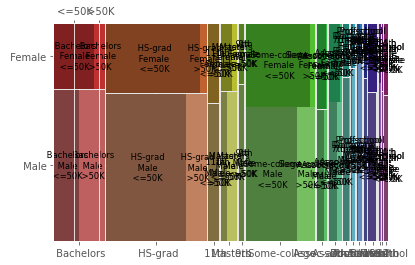

In [6]:
mosaic(data, ['education', 'gender', 'salary-class'])
plt.show()

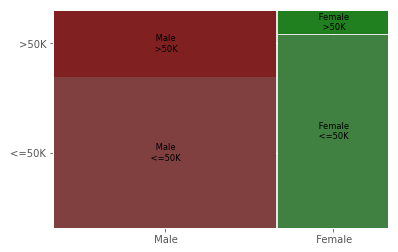

In [7]:
mosaic(data, ['gender','salary-class'])
plt.show()

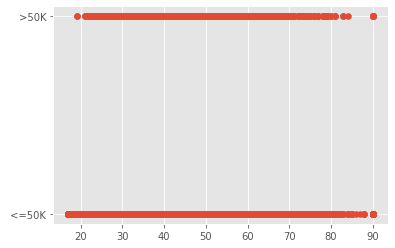

In [8]:
plt.scatter(data['age'], data['salary-class'])
plt.show()

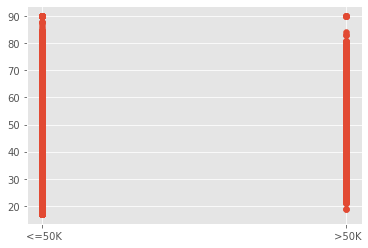

In [9]:
plt.scatter(data['salary-class'], data['age'])
plt.show()

In [10]:
data.columns=data.columns.str.strip()

([<matplotlib.axis.YTick at 0x1366d2550>,
 <a list of 20 Text major ticklabel objects>)

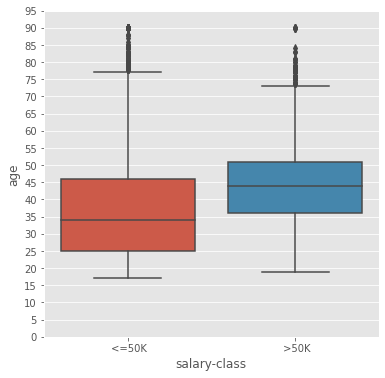

In [11]:
temp_df=data[['age', 'salary-class']]
temp_df=temp_df[temp_df['age']!=0]
plt.figure(figsize=(6,6))
sns.boxplot(temp_df['salary-class'], temp_df['age'])
plt.yticks(list(range(0, 100, 5)))

In [12]:
ncct=pd.crosstab(data['occupation'], data['salary-class']).apply(lambda r: r/r.sum(), axis=1)*100
ncct.sort_values(by='>50K', ascending=False, inplace=True)


KeyError: '>50K'

In [ ]:
ncct.plot.bar(stacked=True, figsize=(10, 5))
plt.legend(loc='lower right')
plt.yticks(list(range(0, 101, 10)))

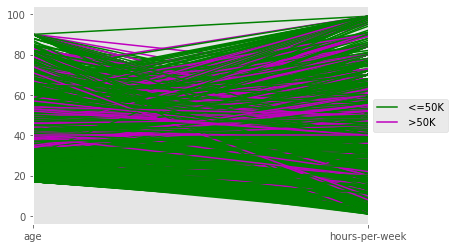

In [65]:
# conn = sqlite3.connect(":memory:")
# db = data.to_sql('adults.data', conn, if_exists='append', index=False)
# con = sqlite3.connect('adults')
# cur = con.cursor()
# cur.execute("SELECT * \
#             FROM adults.data \
#             WHERE salary-class LIKE '%>50K%';")
# counts = cur.fetchall()
# adultStats = pd.DataFrame.from_records(counts, columns=['age', 'hours-per-week'])
parallel_coordinates(data[['age', 'hours-per-week', 'salary-class']], 'salary-class',color=['g','m'])
plt.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

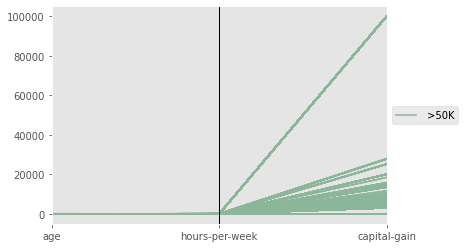

In [66]:
salary_class_condition = data['salary-class'].str.contains('>50K', case=False)
salary_data = data.loc[salary_class_condition]
# print(salary_data)
# salary_data.to_csv('salary-data.csv', index=False, header=False)
parallel_coordinates(salary_data[['age', 'hours-per-week', 'capital-gain','salary-class']], 'salary-class')
plt.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

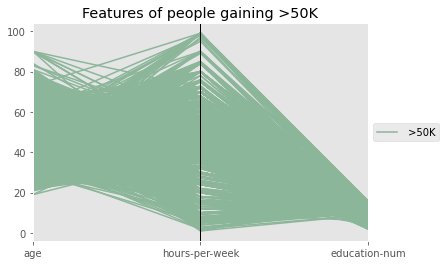

In [67]:
salary_class_over_50K = data['salary-class'].str.contains('>50K', case=False)
salary_data = data.loc[salary_class_over_50K]
# print(salary_data)
# salary_data.to_csv('salary-data.csv', index=False, header=False)
parallel_coordinates(salary_data[['age', 'hours-per-week', 'education-num','salary-class']], 'salary-class')
plt.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.title('Features of people gaining >50K')
plt.show()

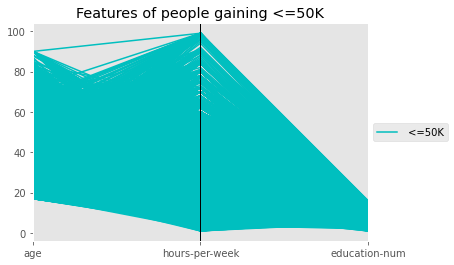

In [68]:
salary_class_under_50K = data['salary-class'].str.contains('<=50K', case=False)
salary_data = data.loc[salary_class_under_50K]
# print(salary_data)
# salary_data.to_csv('salary-data.csv', index=False, header=False)
parallel_coordinates(salary_data[['age', 'hours-per-week', 'education-num','salary-class']], 'salary-class', color=['c'])
plt.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.title('Features of people gaining <=50K')
plt.show()

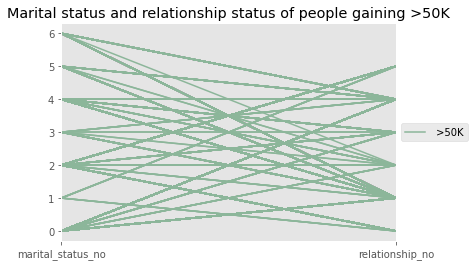

In [69]:
# transform categorical data into numerical data
lb_make = LabelEncoder()
data["marital_status_no"] = lb_make.fit_transform(data["marital-status"])
data["relationship_no"] = lb_make.fit_transform(data["relationship"])
salary_data_over_50K = data.loc[salary_class_over_50K]
# print(salary_data)
# salary_data.to_csv('salary-data.csv', index=False, header=False)
parallel_coordinates(salary_data_over_50K[['marital_status_no','relationship_no','salary-class']], 'salary-class')
plt.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.title('Marital status and relationship status of people gaining >50K')
plt.show()
# TODO legend of encoding needed

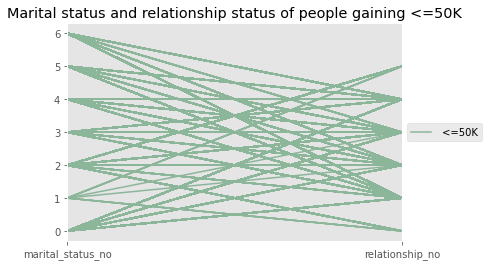

In [70]:
# transform categorical data into numerical data
lb_make = LabelEncoder()
data["marital_status_no"] = lb_make.fit_transform(data["marital-status"])
data["relationship_no"] = lb_make.fit_transform(data["relationship"])
salary_data_under_50K = data.loc[salary_class_under_50K]
# print(salary_data)
# salary_data.to_csv('salary-data.csv', index=False, header=False)
parallel_coordinates(salary_data_under_50K[['marital_status_no','relationship_no','salary-class']], 'salary-class')
plt.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.title('Marital status and relationship status of people gaining <=50K')
plt.show()
# TODO legend of encoding needed

Education of people earning >50K


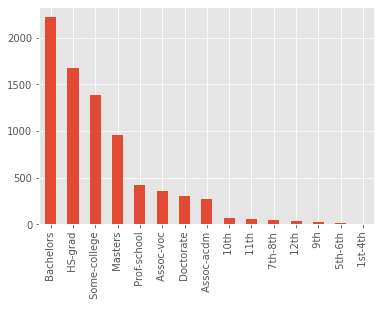

In [40]:
print('Education of people earning >50K')
df = pd.DataFrame.copy(salary_data_over_50K[['salary-class', 'gender', 'education']])
df['education'].value_counts().plot.bar()

# df['education'] = df['education'].map(lambda r: "High ed" if str(r).strip() == "White" OR  else "Ethnic")
# df['income'] = df['income'].map(lambda r: r if str(r).strip() == ">50K" else "≤50k")

# df['combined'] = df['race'] + df['sex']
# df['combined'] = df['combined'].map(lambda r: str(r).replace('Male', '♂').replace('Female', '♀'))

# df = df.sort_values(by=['combined'])

# mosaic(df, ['combined', 'income'],
#       gap=.015,
#       labelizer=labelize, horizontal=False)

# plt.title("Salary variance by race & gender", pad=29)
# plt.savefig('mosaic_race_sex.png', format='png', dpi=600)

# plt.show()


Education of people earning <=50K


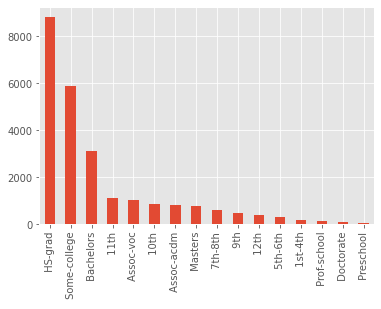

In [41]:
print('Education of people earning <=50K')
df = pd.DataFrame.copy(salary_data_under_50K[['salary-class', 'gender', 'education']])
df['education'].value_counts().plot.bar()

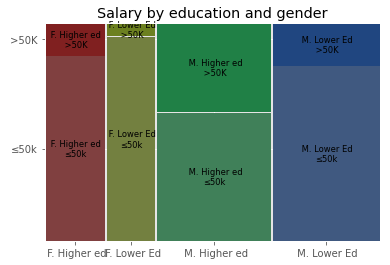

In [63]:
df = pd.DataFrame.copy(data[['salary-class', 'gender', 'education']])
fig, ax = plt.subplots(figsize=(10,10))
higherEducList = ['Some-college', 'Bachelors', 'Assoc-acdm', 'Assoc-voc', 'Masters', 'Doctorate'] 
df['education'] = df['education'].map(lambda r: 'Higher ed' if str(r).strip() in higherEducList else 'Lower Ed')
df['salary-class'] = df['salary-class'].map(lambda r: r if str(r).strip() == ">50K" else "≤50k")

df['combined'] = df['gender'] + df['education']
df['combined'] = df['combined'].map(lambda r: str(r).replace('Male', 'M. ').replace('Female', 'F. '))

df = df.sort_values(by=['combined'])

mosaic(df, ['combined','salary-class'])

plt.title("Salary by education and gender")
plt.savefig('mosaic.png', format='png', dpi=800)

plt.show()